In [57]:
!pip install pyswarm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [58]:
import numpy as np
from tensorflow.keras.models import Sequential
from sklearn.ensemble import RandomForestRegressor
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from pyswarm import pso

In [59]:
# cd '/content/drive/MyDrive/research project/'

In [60]:
df2 = pd.read_csv('city_day.csv')
df2.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [61]:
train_dates = pd.to_datetime(df2['Date'])
print(train_dates.tail(15)) #Check last few dates. 


29516   2020-06-17
29517   2020-06-18
29518   2020-06-19
29519   2020-06-20
29520   2020-06-21
29521   2020-06-22
29522   2020-06-23
29523   2020-06-24
29524   2020-06-25
29525   2020-06-26
29526   2020-06-27
29527   2020-06-28
29528   2020-06-29
29529   2020-06-30
29530   2020-07-01
Name: Date, dtype: datetime64[ns]


#added

In [62]:
pollutants = df2[(df2['Date'] > '2015-12-31') & (df2['Date'] < '2020-01-01') & (df2['City'] == 'Delhi')]
pollutants

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
10594,Delhi,2016-01-01,295.71,476.09,86.62,94.04,131.36,79.87,2.42,23.57,108.14,5.81,16.30,0.00,463.0,Severe
10595,Delhi,2016-01-02,239.21,395.29,69.42,81.22,126.63,65.11,2.15,23.33,90.45,5.79,17.65,NaN,465.0,Severe
10596,Delhi,2016-01-03,270.10,484.82,54.41,76.67,101.63,66.40,2.39,19.94,97.03,5.33,10.78,NaN,426.0,Severe
10597,Delhi,2016-01-04,339.80,586.20,124.31,133.95,164.05,73.73,2.97,27.90,91.20,7.12,19.01,NaN,496.0,Severe
10598,Delhi,2016-01-05,318.10,535.30,106.93,118.81,159.99,78.22,2.85,30.24,131.40,6.45,21.32,NaN,528.0,Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12050,Delhi,2019-12-27,240.07,371.45,28.66,54.60,54.95,52.64,1.39,7.88,27.55,4.62,32.86,0.20,372.0,Very Poor
12051,Delhi,2019-12-28,275.60,426.12,60.13,55.98,83.47,50.47,1.96,10.26,27.92,6.70,39.22,0.40,425.0,Severe
12052,Delhi,2019-12-29,326.79,500.15,32.73,57.76,61.51,49.61,1.86,10.25,35.11,6.28,33.00,0.34,455.0,Severe
12053,Delhi,2019-12-30,333.43,486.35,54.97,55.61,79.04,50.75,2.24,11.15,26.44,8.00,47.12,0.72,506.0,Severe


In [63]:
pollutants = pollutants.reset_index(drop=True)
pollutants.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Delhi,2016-01-01,295.71,476.09,86.62,94.04,131.36,79.87,2.42,23.57,108.14,5.81,16.30,0.0,463.0,Severe
1,Delhi,2016-01-02,239.21,395.29,69.42,81.22,126.63,65.11,2.15,23.33,90.45,5.79,17.65,NaN,465.0,Severe
2,Delhi,2016-01-03,270.10,484.82,54.41,76.67,101.63,66.40,2.39,19.94,97.03,5.33,10.78,NaN,426.0,Severe
3,Delhi,2016-01-04,339.80,586.20,124.31,133.95,164.05,73.73,2.97,27.90,91.20,7.12,19.01,NaN,496.0,Severe
4,Delhi,2016-01-05,318.10,535.30,106.93,118.81,159.99,78.22,2.85,30.24,131.40,6.45,21.32,NaN,528.0,Severe


In [64]:
pollutants = pollutants.drop(columns=['City', 'NH3','NO', 'Benzene',	'Toluene',	'Xylene', 'AQI_Bucket', 'PM2.5', 'PM10', 'NO2', 'NOx', 'CO', 'SO2', 'O3',])
pollutants.head()

,Date,AQI
0,2016-01-01,463.0
1,2016-01-02,465.0
2,2016-01-03,426.0
3,2016-01-04,496.0
4,2016-01-05,528.0


In [65]:
pollutants['Date'] = pd.to_datetime(pollutants['Date'], format='%Y-%m-%d')

In [66]:
pollutants.columns

Index(['Date', 'AQI'], dtype='object')

In [67]:
pollutants = pollutants.set_index('Date')
pollutants.head()

,AQI
Date,
2016-01-01,463.0
2016-01-02,465.0
2016-01-03,426.0
2016-01-04,496.0
2016-01-05,528.0


### Handle Missing Values

In [68]:
df=pollutants

In [69]:
df.isnull().sum(axis=0)

AQI    10
dtype: int64

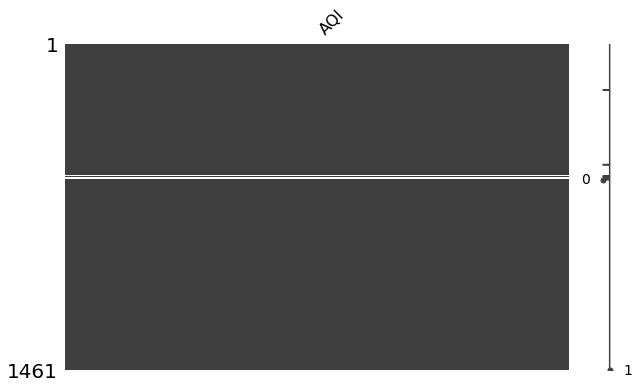

In [70]:
import missingno as msno
msno.matrix(df, figsize=(10,6))
plt.show()

In [71]:
df = df.loc[~df['AQI'].isna()]
df.shape
# 20 rows deleted

(1451, 1)

In [72]:
# target = target.loc[~target.isna()]
# target.shape

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1451 entries, 2016-01-01 to 2019-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AQI     1451 non-null   float64
dtypes: float64(1)
memory usage: 22.7 KB


#### Interpolate the missing values
bfill, ffill, interpolate

Time series data has a lot of variations against time. Hence, imputing using backfill and forward fill isn't the best possible solution to address the missing value problem. A more apt alternative would be to use interpolation methods, where the values are filled with incrementing or decrementing values.

In [74]:
df.interpolate(limit_direction="both", inplace=True)
df.isnull().sum(axis=0)

/usr/local/lib/python3.9/dist-packages/pandas/core/frame.py:10712: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().interpolate(


AQI    0
dtype: int64

In [75]:
df.shape

(1451, 1)

In [76]:
df.describe()

,AQI
count,1451.000000
mean,259.859407
std,125.927925
min,29.000000
25%,155.000000
50%,254.000000
75%,350.000000
max,716.000000


In [77]:
df.head()

,AQI
Date,
2016-01-01,463.0
2016-01-02,465.0
2016-01-03,426.0
2016-01-04,496.0
2016-01-05,528.0


In [78]:
pollutants.shape
# 2016=leap year, so (365*3)+366 = 1461 days i.e. 1461 rows in dataset

(1461, 1)

#Data visualisation 
No need to run again

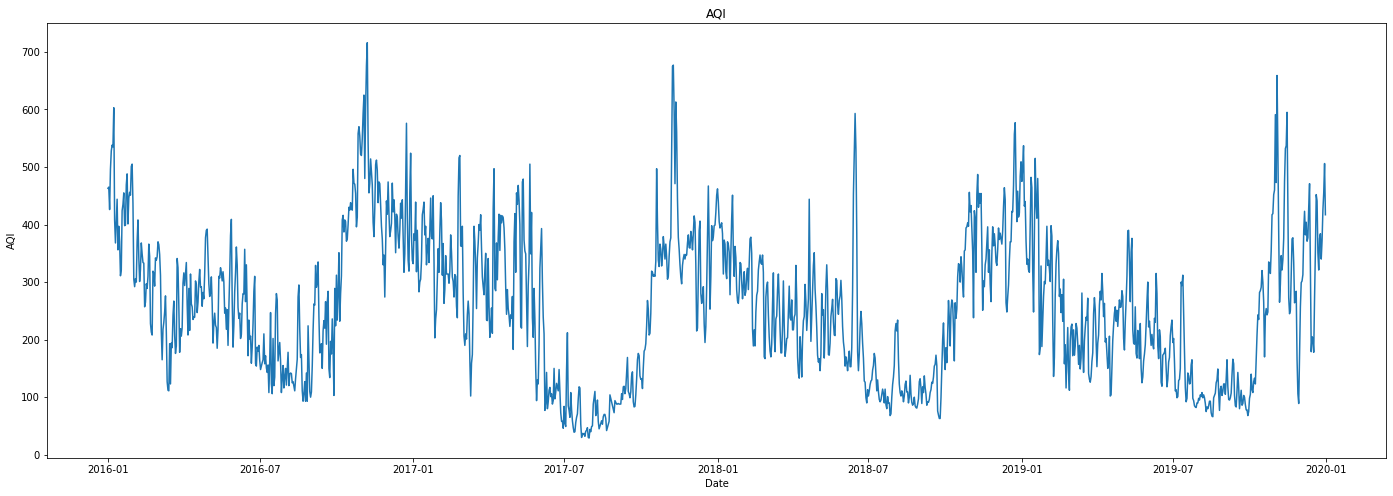

In [79]:
for col in df.columns:
  plt.rcParams['figure.figsize'] = [24,8]
  plt.plot(df[col])
  # naming the x axis
  plt.xlabel('Date')
  # naming the y axis
  plt.ylabel(col)
    
  # giving a title to my graph
  plt.title(col)
    
  # function to show the plot
  plt.show()

In [80]:
df.tail()

,AQI
Date,
2019-12-27,372.0
2019-12-28,425.0
2019-12-29,455.0
2019-12-30,506.0
2019-12-31,417.0


#Feature Scaling


In [81]:
#Variables for training
cols = list(df)[0:df.shape[1]]
#Date and AQI columns are not used in training. 
print(cols) #['CO', 'NO', 'NO2', 'O3', 'SO2', 'pm2_5', 'pm10', 'NH3', 'AQI']


['AQI']


In [82]:
df.isnull().sum()

AQI    0
dtype: int64

In [83]:
df_for_training = df[cols].astype(float)
df_for_training.shape

(1451, 1)

In [84]:
df_for_training.head()

,AQI
Date,
2016-01-01,463.0
2016-01-02,465.0
2016-01-03,426.0
2016-01-04,496.0
2016-01-05,528.0


In [85]:
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled= scaler.transform(df_for_training)

In [86]:
df_for_training_scaled=np.c_[df_for_training_scaled,df['AQI'].to_numpy()]

In [87]:
df_for_training_scaled.shape

(1451, 2)

#Training the model

In [108]:
X = np.array(df['AQI'])
X.shape
type(X)

numpy.ndarray

In [109]:
trainX = []
trainY = []

n_future = 3   # Number of days we want to look into the future based on the past days.
n_past = 5  # Number of past days we want to use to predict the future.

for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(X[i - n_past:i])
    trainY.append(X[i])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (1444, 5).
trainY shape == (1444,).


In [110]:
n_days_for_prediction=200 
X_train=trainX[:-n_days_for_prediction]
y_train=trainY[:-n_days_for_prediction]
X_test = trainX[-n_days_for_prediction:]
y_test=trainY[-n_days_for_prediction:]

In [111]:
from sklearn.metrics import mean_squared_error

In [112]:
def objective_function(params, x_train, y_train):
    n_estimators = int(params[0])
    max_depth = int(params[1])
    min_samples_split = int(params[2])
    min_samples_leaf = int(params[3])

    # train the model with the given hyperparameters
    model = RandomForestRegressor(n_estimators=n_estimators, 
                                   max_depth=max_depth, 
                                   min_samples_split=min_samples_split,
                                   min_samples_leaf=min_samples_leaf)
    model.fit(x_train, y_train)
    y_pred=model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    return rmse
    
    

# define the bounds for the hyperparameters
lb = [50, 2, 2, 1]  # lower bounds
ub = [200, 10, 10, 5]  # upper bounds

# create an instance of the PSO optimizer
# pso_optimizer = GlobalBestPSO(n_particles=10, dimensions=4, options={"c1": 0.5, "c2": 0.3, "w":0.9})

# run the PSO optimizer to find the best hyperparameters
# best_params, _ = pso_optimizer.optimize(objective_function, iters=50,x_train=X_train,   y_train=y_train,  x_val=X_val,y_val=y_val, lb=lb, ub=ub)
best_params, _ = pso(objective_function, lb, ub, args=(trainX, trainY), swarmsize=10, maxiter=15)
# use the best hyperparameters to create a new RandomForestRegressor model

best_n_estimators, best_max_depth, best_min_samples_split, best_min_samples_leaf = best_params
best_model = RandomForestRegressor(n_estimators=int(best_n_estimators), 
                                    max_depth=int(best_max_depth), 
                                    min_samples_split=int(best_min_samples_split), 
                                    min_samples_leaf=int(best_min_samples_leaf))

# train the best model on the full training set
best_model.fit(X_train, y_train)

Stopping search: maximum iterations reached --> 15


RandomForestRegressor(max_depth=10, min_samples_split=3, n_estimators=200)

In [113]:
trainY[0]

538.0

In [114]:

# model = RandomForestRegressor(n_estimators=100, random_state=42)


In [115]:
# model.fit(trainX[:-n_days_for_prediction], trainY[:-n_days_for_prediction])

# plt.plot(history.history['loss'], label='Training loss')
# plt.plot(history.history['val_loss'], label='Validation loss')
# plt.legend()

In [116]:
# from pandas.tseries.holiday import USFederalHolidayCalendar
# from pandas.tseries.offsets import CustomBusinessDay
# us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())

In [117]:
# n_past = 100

y_pred_future = best_model.predict(trainX[-n_days_for_prediction:]) #shape = (n, 1) where n is the n_days_for_prediction
# =trainY[-n_days_for_prediction:]

In [118]:
# prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
# y_pred_future = scaler.inverse_transform(prediction_copies)[:,len(cols)-1]
# # y_pred_future=prediction


In [119]:
# prediction_copies.shape
# prediction

In [120]:
y_pred_future

array([260.7312223 , 220.33513185, 192.39361013, 226.65819402,
       211.38849189, 147.04443614, 137.33738923, 183.09623583,
       174.45369395, 183.83338711, 185.06211736, 171.5165513 ,
       135.88908644, 130.48288458, 164.74621953, 185.52178477,
       204.17650364, 237.69425233, 231.9306074 , 199.78262337,
       200.80449575, 179.89584351, 132.82149953, 122.29224948,
       115.81573871, 116.26518327, 122.76105147, 130.89733493,
       147.39261565, 283.7614548 , 258.78818246, 276.68917102,
       216.93163305, 190.51113644, 162.52811035, 117.7054215 ,
       124.20839341, 126.43898632, 136.13322864, 122.21984602,
       128.07390765, 158.25597225, 183.05632393, 119.96886379,
       122.1700928 ,  90.75210773,  93.81610751,  93.0311924 ,
        94.97835595,  87.25989429, 111.24246055, 105.87933448,
       109.23710484, 108.52027259, 108.69172264, 107.56707344,
       109.6372092 , 107.91669023,  96.23010686,  84.58482389,
        96.28429016,  88.73918876,  91.6068746 , 123.09

#Plotting

In [121]:
#delete it
# type(df.index)

#need to have column as Date for 'original' df
df['Date']=df.index

<ipython-input-121-bfca2cc0d659>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date']=df.index


In [122]:
# predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction,freq='D').tolist()
predict_period_dates = df.tail(n_days_for_prediction)['Date'].tolist()
print(predict_period_dates)

[Timestamp('2019-06-15 00:00:00'), Timestamp('2019-06-16 00:00:00'), Timestamp('2019-06-17 00:00:00'), Timestamp('2019-06-18 00:00:00'), Timestamp('2019-06-19 00:00:00'), Timestamp('2019-06-20 00:00:00'), Timestamp('2019-06-21 00:00:00'), Timestamp('2019-06-22 00:00:00'), Timestamp('2019-06-23 00:00:00'), Timestamp('2019-06-24 00:00:00'), Timestamp('2019-06-25 00:00:00'), Timestamp('2019-06-26 00:00:00'), Timestamp('2019-06-27 00:00:00'), Timestamp('2019-06-28 00:00:00'), Timestamp('2019-06-29 00:00:00'), Timestamp('2019-06-30 00:00:00'), Timestamp('2019-07-01 00:00:00'), Timestamp('2019-07-02 00:00:00'), Timestamp('2019-07-03 00:00:00'), Timestamp('2019-07-04 00:00:00'), Timestamp('2019-07-05 00:00:00'), Timestamp('2019-07-06 00:00:00'), Timestamp('2019-07-07 00:00:00'), Timestamp('2019-07-08 00:00:00'), Timestamp('2019-07-09 00:00:00'), Timestamp('2019-07-10 00:00:00'), Timestamp('2019-07-11 00:00:00'), Timestamp('2019-07-12 00:00:00'), Timestamp('2019-07-13 00:00:00'), Timestamp('20

In [123]:
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())


In [124]:
    
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'AQI':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])


original = df[['Date', 'AQI']]
original['Date']=pd.to_datetime(original['Date'])
# original = original.loc[original['Date'] >= '2022-5-1']
original = original.tail(n_days_for_prediction)

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='AQI'>

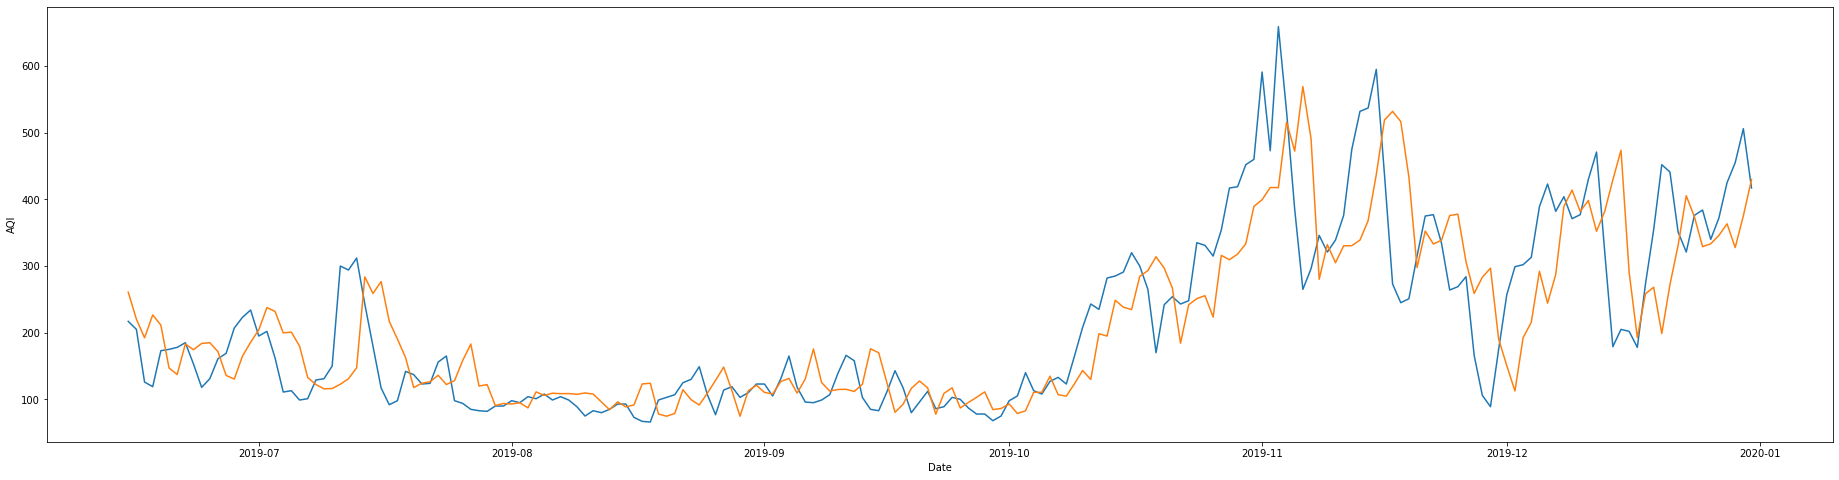

In [125]:
fig, ax = plt.subplots(figsize=(32, 8))
sns.lineplot(original['Date'], original['AQI'],ax=ax)
sns.lineplot(df_forecast['Date'], df_forecast['AQI'],ax=ax)

#Evaluate the model

In [107]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_percentage_error
X,Y=original['AQI'],df_forecast['AQI']
print('r2_score',r2_score(X,Y))
print('mean_absolute_error',mean_absolute_percentage_error(X,Y))
print('mean_squared_error',mean_squared_error(X,Y))

r2_score 0.38839885153545617
mean_absolute_error 0.3770951362455073
mean_squared_error 10789.926159631705


# result
for past_days=1
r2_score 0.825981168884481
mean_absolute_error 7.9691906229654945
mean_squared_error 123.44076830703135

for past_days=5
r2_score 0.7896866702877805
mean_absolute_error 9.00446839650472
mean_squared_error 149.18637735046335

for past_days=3
r2_score 0.79553344454214
mean_absolute_error 8.65560422261556
mean_squared_error 145.03895088259569